In [1]:
# plan
# how does the number of counts vary between the angles in the sinograms

In [2]:
import numpy as np
import importlib
import matplotlib.pyplot as plt

import representation
import kex_data
import kex_headers
import listmode
import petlink
import position

In [3]:
sinograms, _ = kex_data.sinograms()
sinograms = [sino.astype(int) for sino in sinograms]
my_norms = kex_data.get_my_norms()
old_norms, _ = kex_data.get_norm_factors()

In [4]:
def get_2d_sinogram(sinogram, norm=None):
    no_tof_sino = np.sum(sinogram[:13], axis=0)-sinogram[13] #random correction
    no_tof_sino = np.maximum(no_tof_sino, 0)  #ReLu
    if norm is None:
        norm_sino = no_tof_sino
    else:
        norm_sino = no_tof_sino*norm
    no_mi_sino = np.sum(norm_sino, axis=0)
    return no_mi_sino

In [5]:
raw_sinos = [get_2d_sinogram(s) for s in sinograms]

In [6]:
my_norm_sinos = [get_2d_sinogram(s, n) for s,n in zip(sinograms, my_norms)]

In [7]:
old_norm_sinos = [get_2d_sinogram(s, n) for s,n in zip(sinograms, old_norms)]

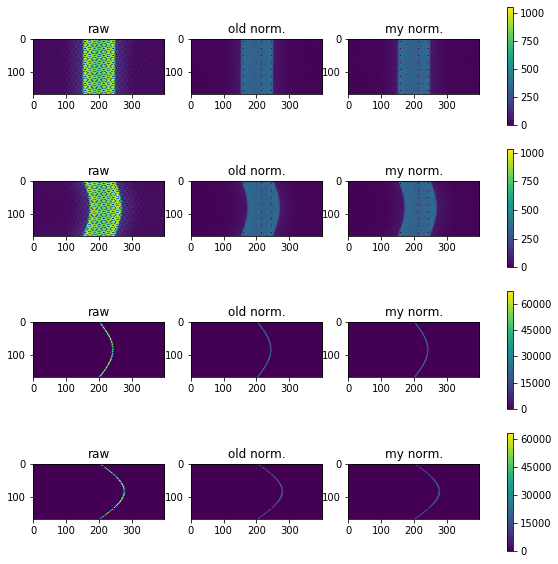

In [8]:
fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(10,10))
import visual
for rs, mns, oms, row in zip(raw_sinos, my_norm_sinos, old_norm_sinos,axes):
    ims = []
    for sino, title, ax in zip([rs,oms,mns,], ["raw", "old norm.", "my norm."], row):
        ims.append(ax.imshow(sino))
        ax.set_title(title)
    visual.same_colorbar(fig, ims, row)
plt.show()

In [9]:
diffs = [(a-b)/a for a,b in zip(my_norm_sinos, old_norm_sinos)]

C:\Users\petct\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


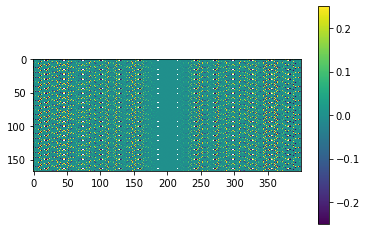

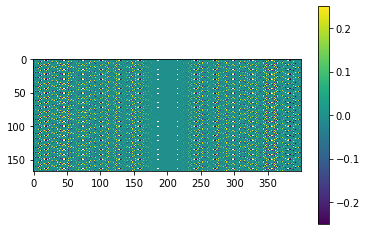

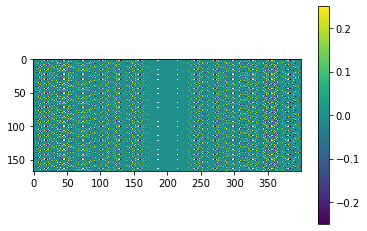

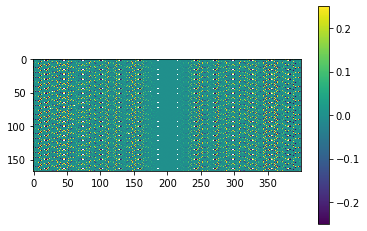

In [13]:
for diff in diffs:
    plt.imshow(diff, clim=[-0.25, +0.25])
    plt.colorbar() 
    plt.show()

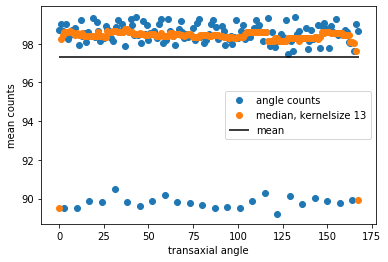

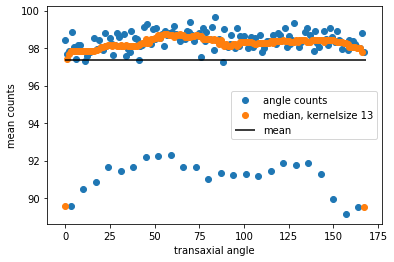

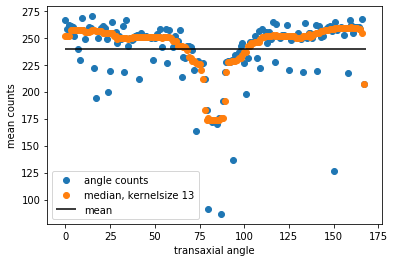

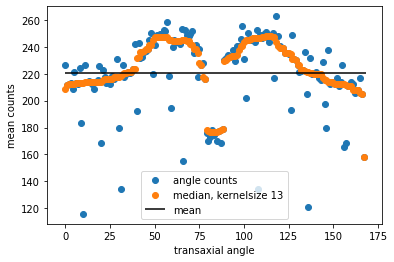

In [11]:
from scipy import signal

for sino in my_norm_sinos:
    angle_counts = np.mean(sino, axis=1)
    angles = np.arange(len(angle_counts))
    plt.scatter(angles,angle_counts, label='angle counts')
    kernel_size = 13
    smooth = signal.medfilt(angle_counts, kernel_size)
    plt.scatter(angles, 
                smooth,  
                label='median, kernelsize {}'.format(kernel_size))
    plt.hlines(np.mean(angle_counts), 0, len(angle_counts), label="mean")
    plt.legend()
    plt.xlabel('transaxial angle')
    plt.ylabel("mean counts")
    plt.show()